# Machine Learning Foundation

## Course 3, Part b: K-Nearest Neighbor LAB

## Introduction and Learning Goals

In this lab, we explore classification using the K-Nearest Neighbors approach. We use a customer churn dataset from the telecom industry which includes customer data, usage of long-distance, data usage, monthly revenue, type of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, include several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data include a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing, then use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables in order to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("churndata.csv")
data.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
round(data.describe(),2)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,...,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,...,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [5]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

- The data are encoded and scaled, separate the features (X) from the target (y, churn_value). 
* Split the sample into training and test samples, with the test sample representing 40% of observations.
* Estimate a K-Nearest Neighbors model, using K=3.
* Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
* Use a graphic to illustrate the Confusion Matrix 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [19]:
# Set up X and y variables

X = data.drop(columns="churn_value")
y = data["churn_value"]

In [21]:
y.value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [22]:
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print(f"Accuracy score: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"F1 score: {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1524
           1       0.78      0.72      0.75       589

    accuracy                           0.86      2113
   macro avg       0.84      0.82      0.83      2113
weighted avg       0.86      0.86      0.86      2113

Accuracy score: 0.86
F1 score: 0.75


Text(0.5, 69.0, 'Ground Truth')

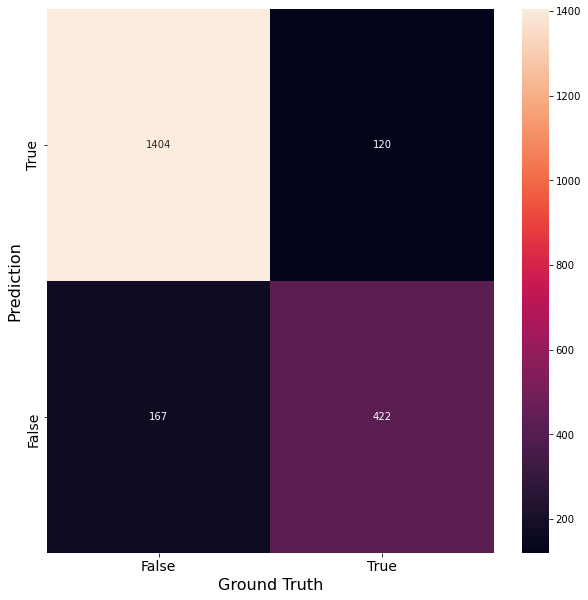

In [30]:
# Plot confusion matrix

_, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
labels = ["False", "True"]
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(labels[::-1], fontsize=14)
ax.set_ylabel("Prediction", fontsize=16)
ax.set_xlabel("Ground Truth", fontsize=16)

## Question 5
* Using the same split of training and test samples, estimate another K-Nearest Neighbors model
* This time, use K=5 and weight the results by distance
* Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix. 

In [33]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn2 = knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)

# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print(f"Accuracy score: {round(accuracy_score(y_test, y_pred), 2)}")
print(f"F1 score: {round(f1_score(y_test, y_pred), 2)}")

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1524
           1       0.80      0.75      0.77       589

    accuracy                           0.88      2113
   macro avg       0.85      0.84      0.84      2113
weighted avg       0.87      0.88      0.88      2113

Accuracy score: 0.88
F1 score: 0.77


Text(0.5, 69.0, 'Ground Truth')

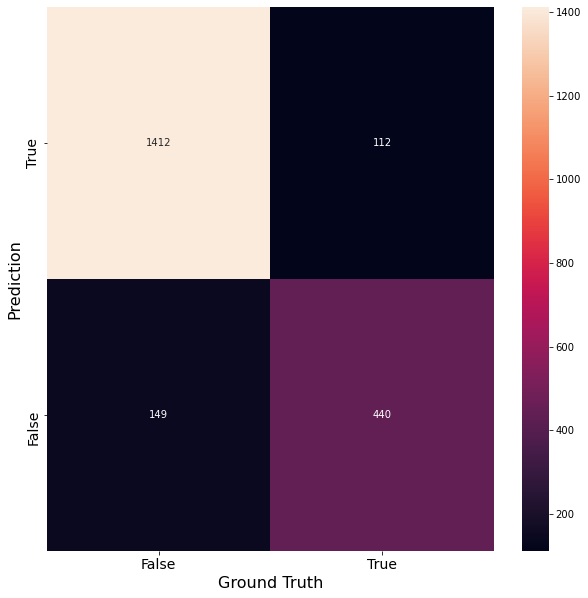

In [34]:
# Plot confusion matrix

_, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
labels = ["False", "True"]
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(labels[::-1], fontsize=14)
ax.set_ylabel("Prediction", fontsize=16)
ax.set_xlabel("Ground Truth", fontsize=16)

## Question 6
* To determine the right value for K, examing results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy)
* Generate charts which plot each of these measures as a function of K. 
* What do these charts suggest about the optimal value for K?

In [35]:
max_k = 40
f1_scores = []
error_rates = [] #error rate = 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1 - round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=["K", "F1 Score"])
error_results = pd.DataFrame(error_rates, columns=["K", "Error Rate"])

<Figure size 1800x1200 with 0 Axes>

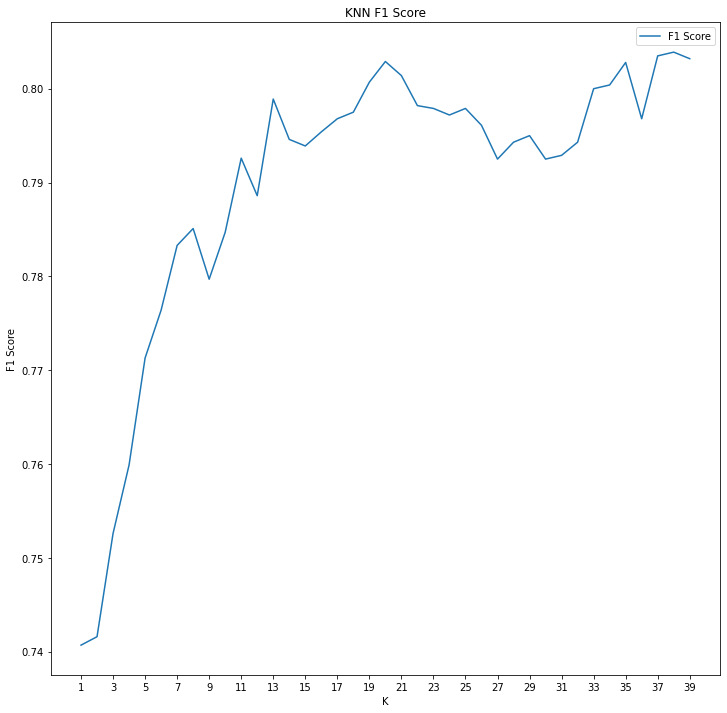

In [36]:
# Plot F1 results

plt.figure(dpi=300)
ax = f1_results.set_index("K").plot(figsize=(12, 12))
ax.set(xlabel="K", ylabel="F1 Score")
ax.set_xticks(range(1, max_k, 2))
plt.title("KNN F1 Score")
plt.savefig("knn_f1.png")

<Figure size 1800x1200 with 0 Axes>

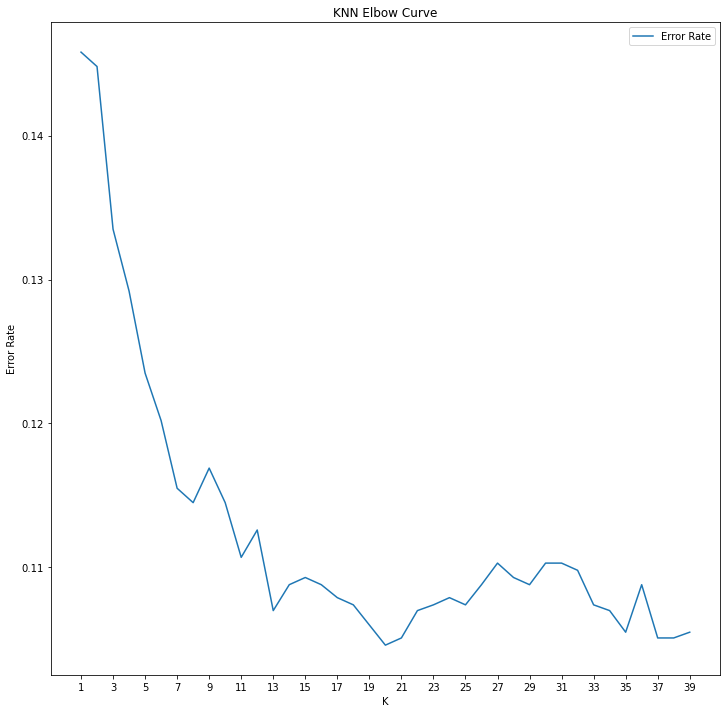

In [37]:
# Plot Accuracy (Error Rate) results

plt.figure(dpi=300)
ax = error_results.set_index("K").plot(figsize=(12, 12))
ax.set(xlabel="K", ylabel="Error Rate")
ax.set_xticks(range(1, max_k, 2))
plt.title("KNN Elbow Curve")
plt.savefig("knn_elbow.png")

***